In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import sys 
sys.path.append('../../')

import helpers.data_helpers as data_helpers

In [3]:
df = data_helpers.pickle_to_df_full('../../data/BTCUSDT_futures.pkl')


In [5]:
df = df.loc['2022-01-01':'2024-01-01']

db_value = 90_000_000
db_df = data_helpers.dollar_bar_func(df, db_value)

In [7]:
db_df.to_csv('BTCUSDT_90millfull.csv')

In [2]:
db_df = pd.read_csv('../../data/BTCUSDT_90millfull.csv')

In [25]:
db_df.loc[:, 'taker_pct'] = db_df['Taker quote volume'] / db_df['Quote volume'] 

average_value = db_df['taker_pct'].mean()
top_threshold_value = db_df['taker_pct'].quantile(0.99)
bottom_threshold_value = db_df['taker_pct'].quantile(0.01)

print(f"Average of the column: {average_value}")
print(f"Highest 25% threshold value: {top_threshold_value}")
print(f"Bottom 25% threshold value: {bottom_threshold_value}")

# Filter the DataFrame to get values above the threshold
db_df['top_taker_pct'] = 0  # Initialize the column with default value
db_df.loc[db_df['taker_pct'] > top_threshold_value, 'top_taker_pct'] = 1
db_df.loc[db_df['taker_pct'] < bottom_threshold_value, 'top_taker_pct'] = -1

Average of the column: 0.49967329975047126
Highest 25% threshold value: 0.6914059955989625
Bottom 25% threshold value: 0.3104273696833472


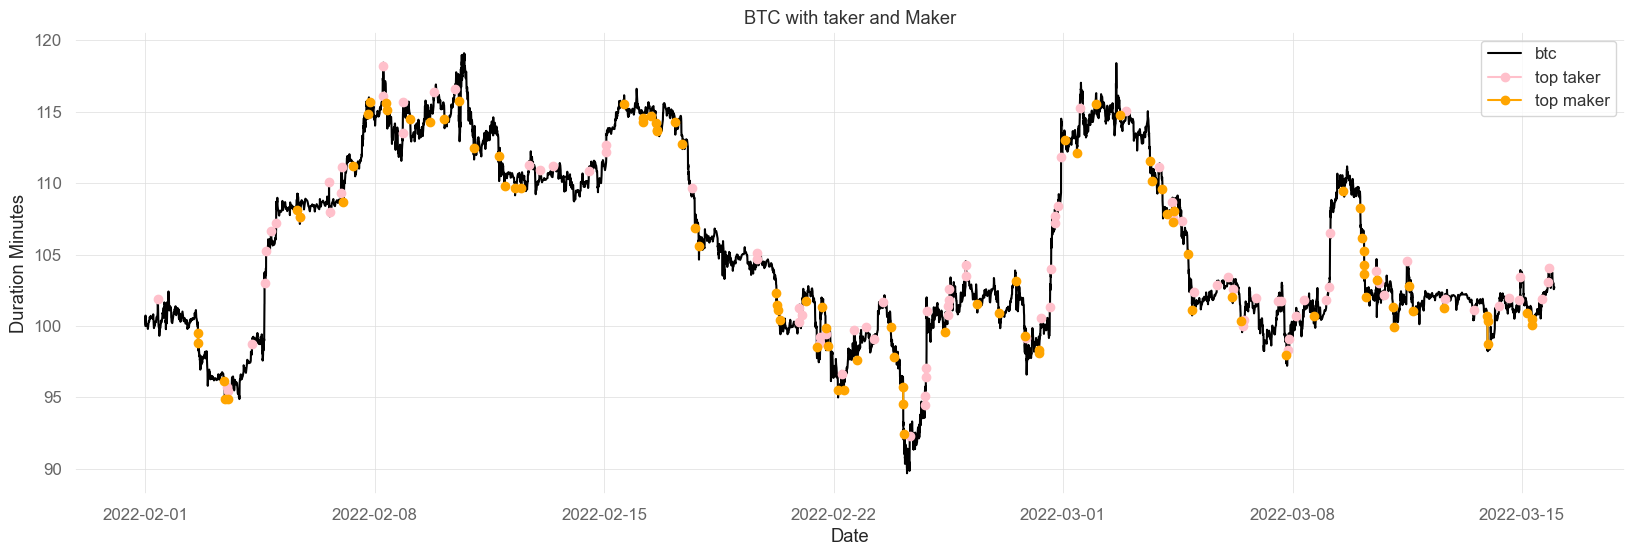

In [27]:
#lets graph these points
# db_df['Close Time'] = pd.to_datetime(db_df['Close Time'])
# db_df= db_df.set_index('Close Time')

start = '2022-02-01'
end = '2022-03-15'

plot_sample = db_df.loc[start:end].copy()

base_value = 100
plot_sample['Normalized Price'] = plot_sample['Close'] / plot_sample['Close'].iloc[0] * base_value

plot_sample['top taker'] = np.where(plot_sample['top_taker_pct'] == 1, plot_sample['Normalized Price'], None)
plot_sample['top maker'] = np.where(plot_sample['top_taker_pct'] == -1, plot_sample['Normalized Price'], None)

# Plot the Close, SMA, and EMA
plt.figure(figsize=(20, 6))
plt.plot(plot_sample.index, plot_sample['Normalized Price'], label='btc', color = 'black')
plt.plot(plot_sample.index, plot_sample['top taker'], label='top taker', marker = 'o', color = 'pink')
plt.plot(plot_sample.index, plot_sample['top maker'], label='top maker', marker = 'o', color = 'orange')
# plt.plot(plot_sample.index, plot_sample['Close'], label='close', linestyle='--', color = 'black')
# plt.plot(plot_sample.index, plot_sample['sma'], label=f'SMA ({sma_window} periods)', linestyle='--', marker='o')
# plt.plot(plot_sample.index, plot_sample['ema'], label=f'EMA (span={ema_span})', linestyle='--', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Duration Minutes')
plt.title(f'BTC with taker and Maker')
plt.legend()
# Display the plot
plt.show()

In [ ]:
# Seems to not be very easy to use 